<a href="https://colab.research.google.com/github/ramendrasingla/data_analysis_tutorial/blob/main/Data_Analysis_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


# Download Kaggle Dataset

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp ./drive/MyDrive/Newton\ School/Data\ Analysis/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download johnsmith88/heart-disease-dataset
!unzip heart-disease-dataset.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 8.33MB/s]
Archive:  heart-disease-dataset.zip
  inflating: heart.csv               


# Part - 1

## Data Preprocessing

In [ ]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Dimensions of data

In [ ]:
df_shape = df.shape 
print("Shape = {}".format(df_shape))

Shape = (1025, 14)


In [ ]:
df_size = df.size 
print("Size = {}".format(df_size)) 

Size = 14350


In [ ]:
df_ndim = df.ndim 
print("Dataframe dimension = {}".format(df_ndim)) 

series_ndim = df["age"].ndim 
print("Column dimension  = {}".format(series_ndim))

Dataframe dimension = 2
Column dimension  = 1


### Column preprocessing

In [ ]:
columns = df.columns
columns_list = list(df.columns)
print(df.columns)
print(columns_list)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data = {'Name#': ['Mukul', 'Rohan', 'Mayank','Shubham', 'Aakash'], 
        'Location&': ['Saharanpur', 'Meerut', 'Agra','Saharanpur', 'Meerut'], 
        'Pay@': [25000, 30000, 35000, 40000, 45000] 
   } 
 
df = pd.DataFrame(data) 
print("Original Dataframe:\n", df) 
 
df.columns = df.columns.str.replace('[#,@,&]', '')
print("\nUpdated Dataframe:\n", df)

Original Dataframe:
      Name#   Location&   Pay@
0    Mukul  Saharanpur  25000
1    Rohan      Meerut  30000
2   Mayank        Agra  35000
3  Shubham  Saharanpur  40000
4   Aakash      Meerut  45000

Updated Dataframe:
       Name    Location    Pay
0    Mukul  Saharanpur  25000
1    Rohan      Meerut  30000
2   Mayank        Agra  35000
3  Shubham  Saharanpur  40000
4   Aakash      Meerut  45000


<ipython-input-9-53aeccc52247>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[#,@,&]', '')


In [ ]:
df.describe()

,Pay
count,5.00000
mean,35000.00000
std,7905.69415
min,25000.00000
25%,30000.00000
50%,35000.00000
75%,40000.00000
max,45000.00000


### Data Cleaning

In [ ]:
df = pd.DataFrame({'team' : ['Mavs$', 'Nets', 'Kings!!', 'Spurs% ', '&Heat&'], 
                   'points' : [12, 15, 22, 29, 24]}) 

print("Original Dataframe:\n", df) 

df['team'] = df['team'].str.replace('\W', '', regex=True) 
print("\nUpdated Dataframe:\n", df)

Original Dataframe:
       team  points
0    Mavs$      12
1     Nets      15
2  Kings!!      22
3  Spurs%       29
4   &Heat&      24

Updated Dataframe:
     team  points
0   Mavs      12
1   Nets      15
2  Kings      22
3  Spurs      29
4   Heat      24


In [ ]:
## Missing Data
data = {'First Score':[85, 87, np.nan, 98, np.nan], 
        'Second Score': [22, 43, 64, np.nan, np.nan], 
        'Third Score':[np.nan, 20, 45, 100, np.nan]} 
  
df = pd.DataFrame(data) 
# print(df)
print(df.isnull())

   First Score  Second Score  Third Score
0        False         False         True
1        False         False        False
2         True         False        False
3        False          True        False
4         True          True         True


In [ ]:
first_score_null = df['First Score'].isnull()
first_score_null_df = df[first_score_null]
print(first_score_null_df)

   First Score  Second Score  Third Score
2          NaN          64.0         45.0
4          NaN           NaN          NaN


In [ ]:
any_null = df.isnull().any(axis=1)
# print(any_null)
any_null_df = df[any_null]
print(any_null_df)

   First Score  Second Score  Third Score
0         85.0          22.0          NaN
2          NaN          64.0         45.0
3         98.0           NaN        100.0
4          NaN           NaN          NaN


In [ ]:
all_null = df.isnull().all(axis=1)
all_null_df = df[all_null]
print(all_null_df)

   First Score  Second Score  Third Score
4          NaN           NaN          NaN


In [ ]:
## Fill NA
df_fill_const = df.fillna(0)
df_ffill = df.fillna(method = 'ffill')
df_bfill = df.fillna(method = 'bfill')

In [ ]:
print('Fill Constant:\n',df_fill_const)
print('Forward Fill:\n',df_ffill)
print('Backward Fill:\n',df_bfill)

Fill 0:
    First Score  Second Score  Third Score
0         85.0          22.0          0.0
1         87.0          43.0         20.0
2          0.0          64.0         45.0
3         98.0           0.0        100.0
4          0.0           0.0          0.0
Forward Fill:
    First Score  Second Score  Third Score
0         85.0          22.0          NaN
1         87.0          43.0         20.0
2         87.0          64.0         45.0
3         98.0          64.0        100.0
4         98.0          64.0        100.0
Backward Fill:
    First Score  Second Score  Third Score
0         85.0          22.0         20.0
1         87.0          43.0         20.0
2         98.0          64.0         45.0
3         98.0           NaN        100.0
4          NaN           NaN          NaN


In [ ]:
## Replace
df_replace = df.replace(to_replace = np.nan, value = "0")
print(df_replace) 

  First Score Second Score Third Score
0        85.0         22.0           0
1        87.0         43.0        20.0
2           0         64.0        45.0
3        98.0            0       100.0
4           0            0           0


In [ ]:
## Drop NA
df_dropna_any = df.dropna(how = 'any')
df_dropna_all = df.dropna(how = 'all')

In [ ]:
print('Drop NA Any:\n',df_dropna_any)
print('Drop NA All:\n',df_dropna_all)

Drop NA Any:
    First Score  Second Score  Third Score
1         87.0          43.0         20.0
Drop NA All:
    First Score  Second Score  Third Score
0         85.0          22.0          NaN
1         87.0          43.0         20.0
2          NaN          64.0         45.0
3         98.0           NaN        100.0


## Data Visualization

[Case Study](https://github.com/ramendrasingla/Human-or-Robot/blob/main/Business_Problem__EDA.ipynb)

# Part - 2

## Exploratory Data Analysis(EDA)

 

*   It is best to first analyse the data and then strive to get as many insights as possible from it. Before getting their hands dirty with data, EDA is all about making sense of it.
*   Exploratory Data Analysis is the crucial process of doing preliminary investigations on data in order to uncover patterns, spot anomalies, test hypotheses, and validate assumptions using summary statistics and graphical representations.

We will examine numerous exploratory data analysis strategies such as: 


*   Descriptive statistics
*   Data grouping
*   Analysis Of Variance(ANOVA)
*   Correlation and Correlation computation





### Describe statistics

In [ ]:
df = pd.read_csv('heart.csv')
print("Dataframe shape: {}".format(df.shape))
df.head()
df.tail()

Dataframe shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df["sex"].value_counts()

1    713
0    312
Name: sex, dtype: int64

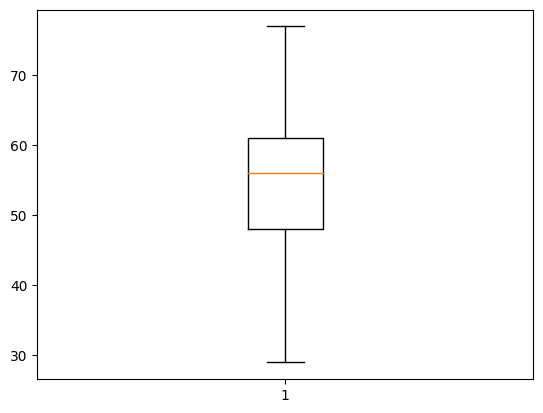

In [ ]:
#IQR: Inter-Quartile Range
plt.boxplot(list(df.age))
plt.show()

### Grouping data

In [ ]:
df.groupby(['sex', 'target']).mean()

age        cp    trestbps        chol       fbs   restecg  \
sex target                                                                    
0   0       59.058140  0.174419  146.488372  276.732558  0.267442  0.534884   
    1       54.628319  1.323009  128.836283  255.641593  0.084071  0.588496   
1   0       56.050847  0.547215  131.527845  245.995157  0.142857  0.440678   
    1       50.736667  1.420000  129.553333  229.933333  0.173333  0.606667   

               thalach     exang   oldpeak     slope        ca      thal  
sex target                                                                
0   0       142.348837  0.581395  1.876744  0.965116  1.313953  2.500000  
    1       154.057522  0.106195  0.557522  1.579646  0.300885  2.000000  
1   0       138.460048  0.542373  1.542615  1.208232  1.125908  2.547215  
    1       161.996667  0.156667  0.579333  1.603333  0.423333  2.210000

### ANOVA:
ANOVA is an abbreviation for Analysis of Variance. It is used to determine the relationship between several groups of categorical data
As a consequence of ANOVA, we have two measures:

*   F-testscore
*   p-value

Scipy offers libraries to ANOVA(f_oneway)



### Correlation and Correlation computation

* Correlation is a basic connection between two variables in which one one influences the other. Correlation is distinct from the act of causation. Pearson correlation is one method for calculating correlation between variables.

* We may discover two parameters here: the Pearson coefficient and the p-value. When the Pearson correlation coefficient is near to 1 or -1 and the p-value is less than 0.0001, we may claim there is a strong correlation between two variables.

## Matplotlib & Seaborn

### Matplotlib

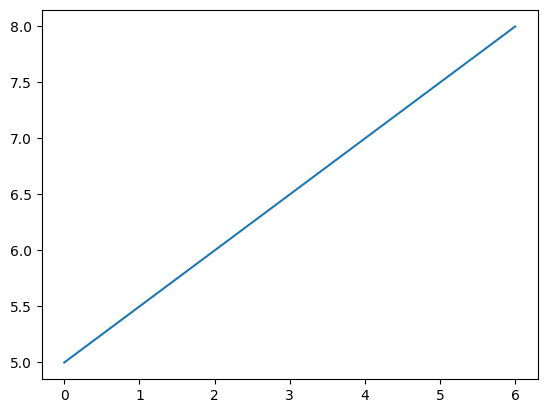

In [ ]:
xpoints = np.array([0,6])
ypoints = np.array([5,8])

plt.plot(xpoints, ypoints)
plt.show()

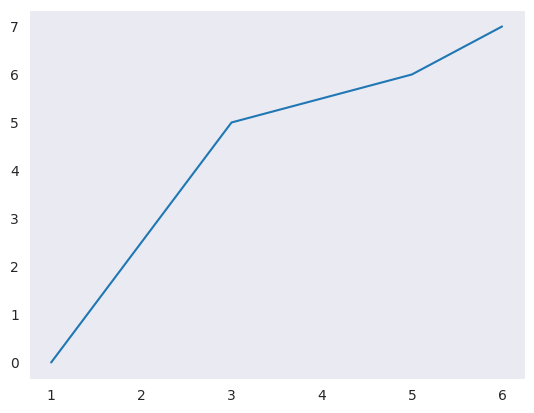

In [ ]:
xpoints = np.array([1,3,5,6])
ypoints = np.array([0,5,6,7])

plt.plot(xpoints, ypoints)
plt.show()

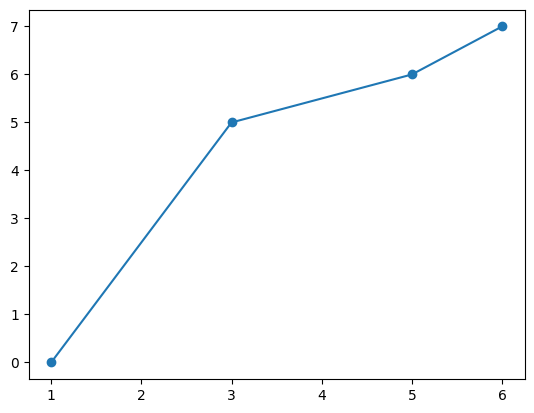

In [ ]:
plt.plot(xpoints, ypoints, marker = 'o') 
plt.show()

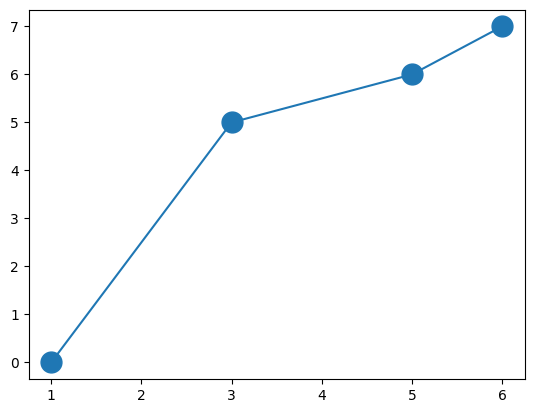

In [ ]:
plt.plot(xpoints, ypoints, marker = 'o', ms = 15) 
plt.show()

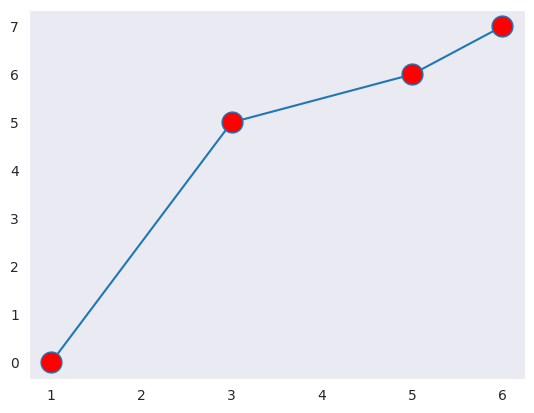

In [ ]:
# plt.plot(xpoints, ypoints, marker = 'o', ms = 15, mec = 'r') # Marker edge color
plt.plot(xpoints, ypoints, marker = 'o', ms = 15, mfc = 'r') # Marker face color
plt.show()

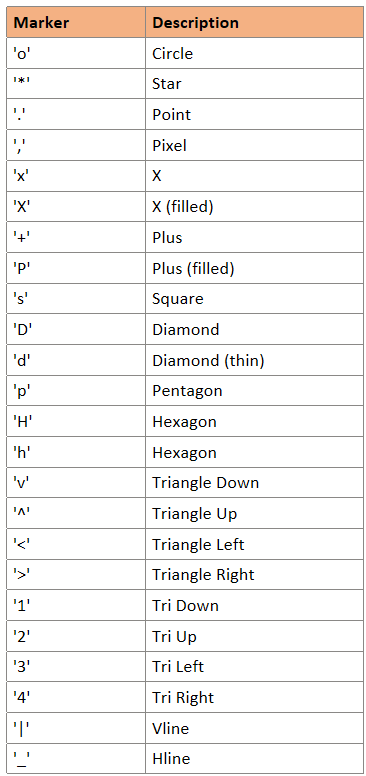

In [ ]:
## Marker image
Image(filename='/content/drive/MyDrive/Newton School/Data Analysis/markers.png')

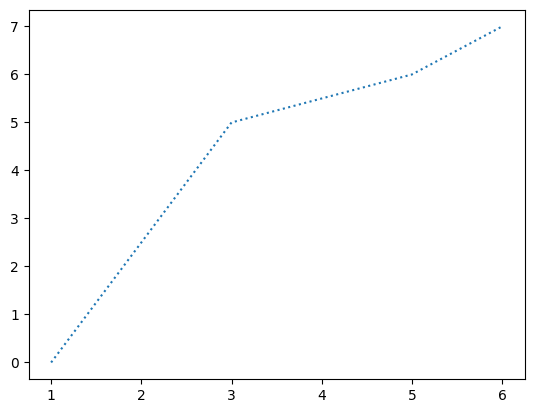

In [ ]:
plt.plot(xpoints, ypoints, linestyle = 'dotted') 
plt.show()

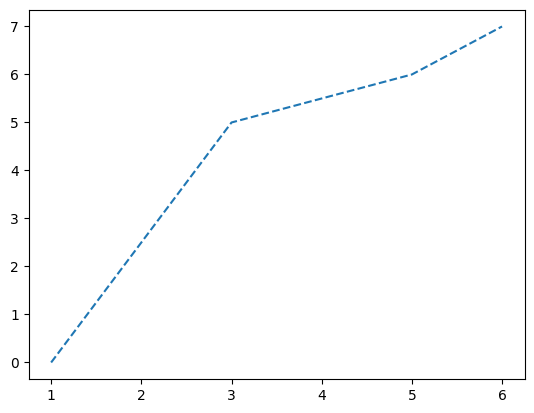

In [ ]:
plt.plot(xpoints, ypoints, ls = '--') 
plt.show()

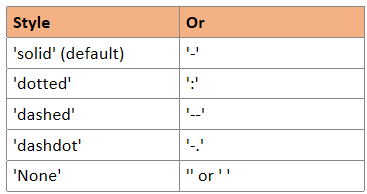

In [ ]:
## Linestyle
Image(filename='/content/drive/MyDrive/Newton School/Data Analysis/linestyle.png')

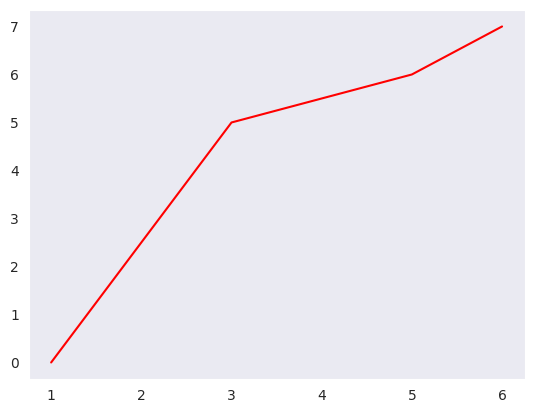

In [ ]:
plt.plot(xpoints, ypoints, color = 'red')
plt.show()

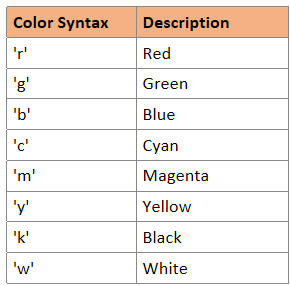

In [ ]:
## Line color
Image(filename='/content/drive/MyDrive/Newton School/Data Analysis/line color.png')

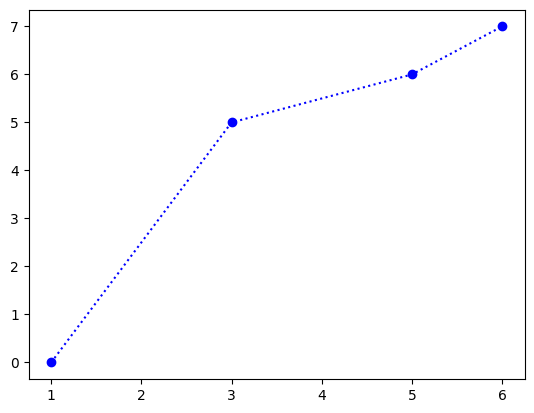

In [ ]:
plt.plot(xpoints, ypoints, 'o:b') #marker, linestyle, linecolor
plt.show()

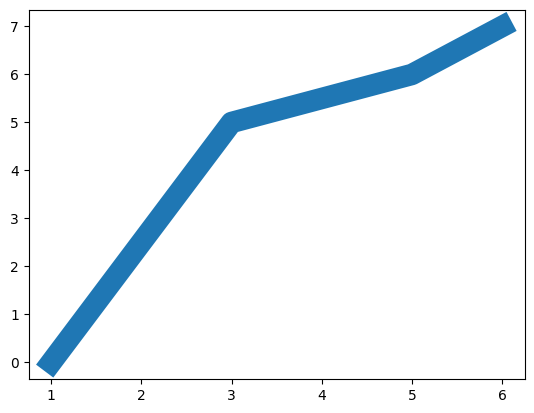

In [ ]:
plt.plot(xpoints, ypoints, linewidth = '15.5') 
plt.show()

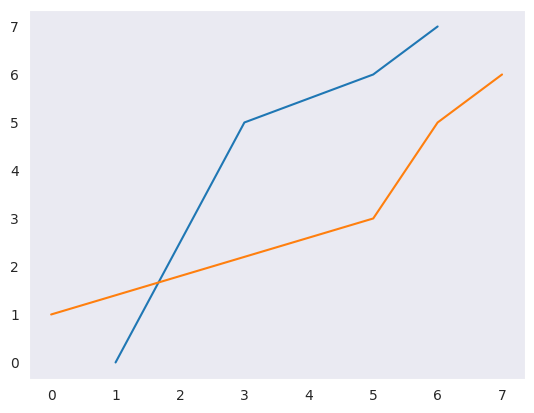

In [ ]:
# Multiple lines
a = np.array([1,3,5,6])
b = np.array([0,5,6,7])

plt.plot(a, b)
plt.plot(b, a)
plt.show() 

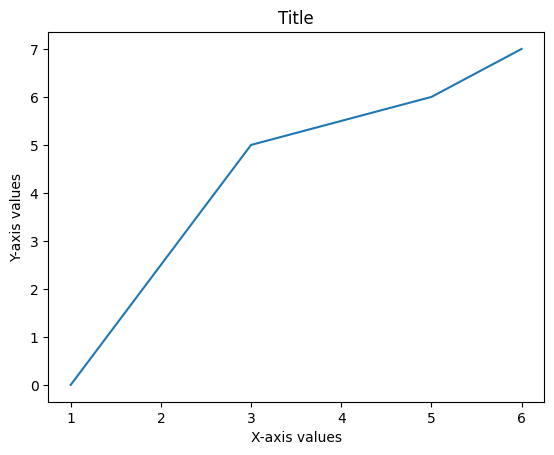

In [ ]:
plt.plot(xpoints, ypoints)

plt.xlabel('X-axis values')
plt.ylabel('Y-axis values')
plt.title("Title") 

plt.show()

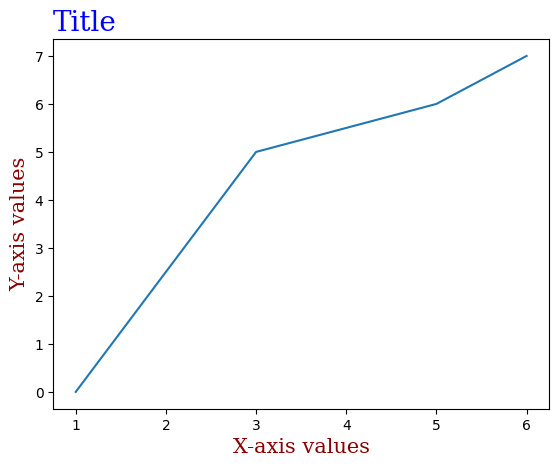

In [ ]:
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
 
plt.plot(xpoints, ypoints)

plt.title("Title", fontdict = font1, loc = 'left') #Title font and location
plt.xlabel('X-axis values', fontdict = font2)
plt.ylabel('Y-axis values', fontdict = font2)

plt.show()

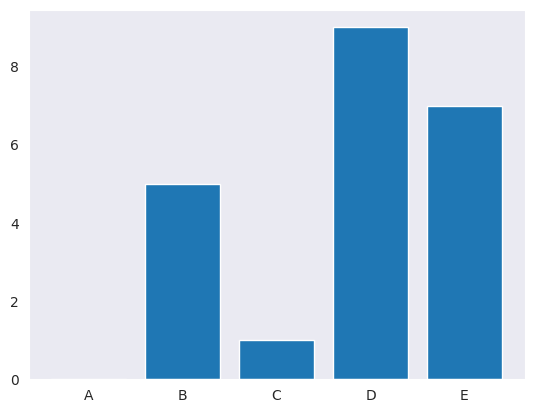

In [ ]:
x1 = np.array(['A', 'B', 'C', 'D', 'E'])
y1 = np.array([0, 5, 1, 9, 7])

plt.bar(x1, y1)

plt.show()

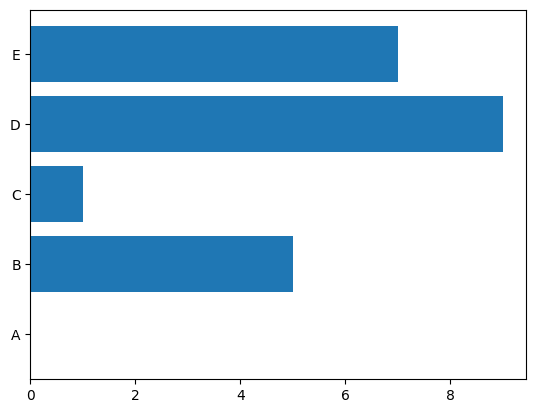

In [ ]:
x1 = np.array(['A', 'B', 'C', 'D', 'E'])
y1 = np.array([0, 5, 1, 9, 7])

plt.barh(x1, y1)

plt.show()

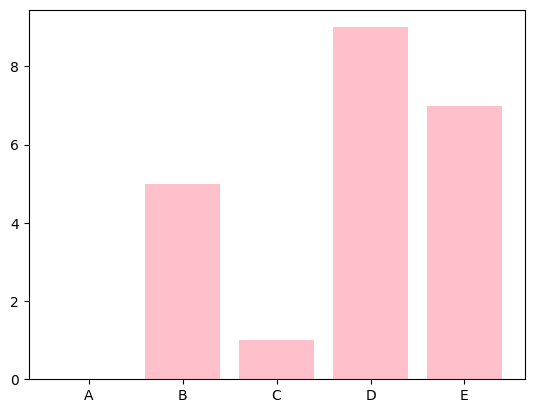

In [ ]:
x1 = np.array(['A', 'B', 'C', 'D', 'E'])
y1 = np.array([0, 5, 1, 9, 7])

plt.bar(x1, y1, color = 'pink')

plt.show()

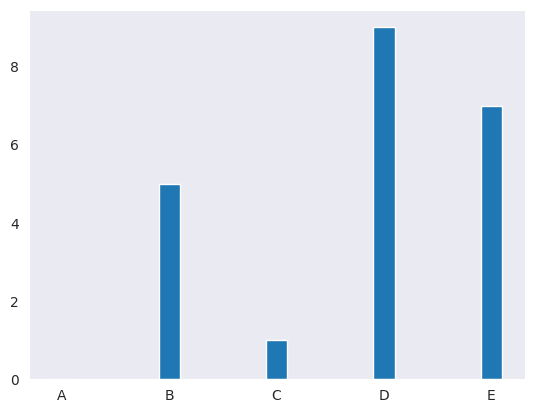

In [ ]:
x1 = np.array(['A', 'B', 'C', 'D', 'E'])
y1 = np.array([0, 5, 1, 9, 7])

plt.bar(x1, y1, width = 0.2)

plt.show()

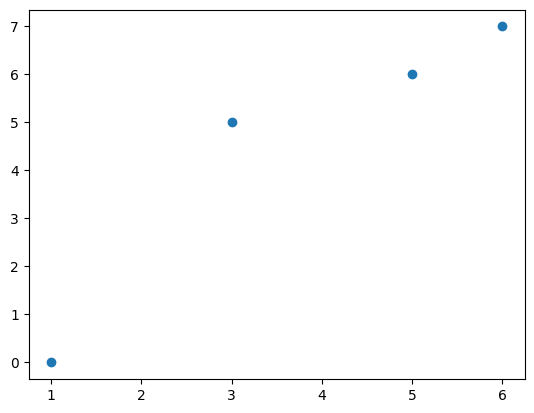

In [ ]:
x = np.array([1,3,5,6])
y = np.array([0,5,6,7])

plt.scatter(x, y)
plt.show()

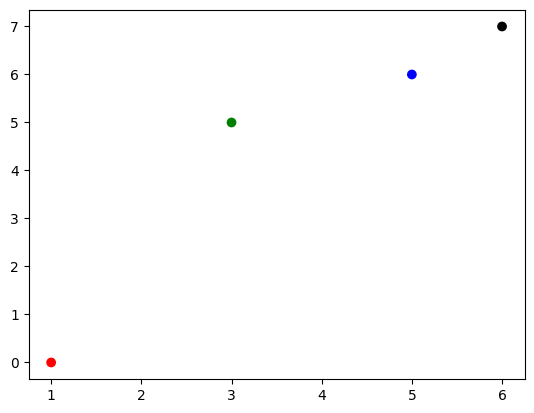

In [ ]:
x = np.array([1,3,5,6])
y = np.array([0,5,6,7])
color = np.array(['red', 'green', 'blue', 'black'])

plt.scatter(x, y, c = color)
plt.show()

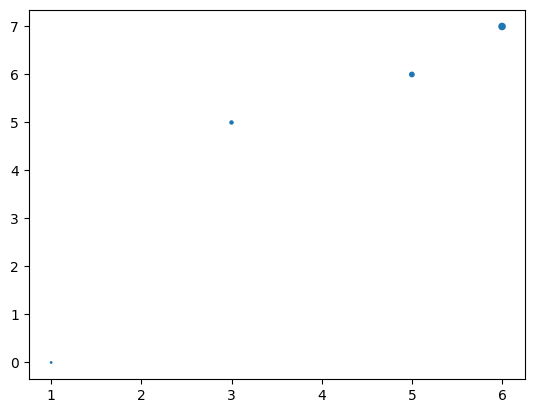

In [ ]:
x = np.array([1,3,5,6])
y = np.array([0,5,6,7])
size = np.array([1, 5, 10, 20])

plt.scatter(x, y, s = size)
plt.show()

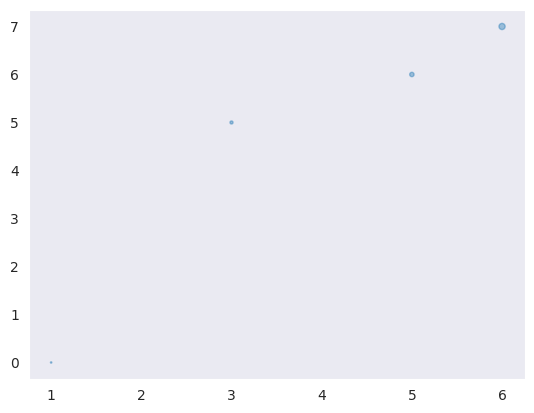

In [ ]:
x = np.array([1,3,5,6])
y = np.array([0,5,6,7])
size = np.array([1, 5, 10, 20])

plt.scatter(x, y, s = size, alpha = 0.4)
plt.show()

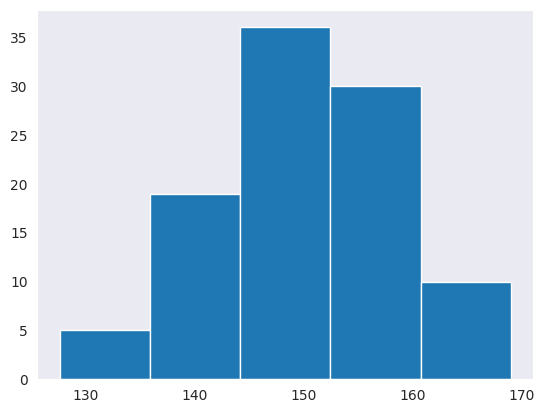

In [ ]:
x = np.random.normal(150, 10, 100) 
# print(x)

plt.hist(x, bins = 5)
plt.show()

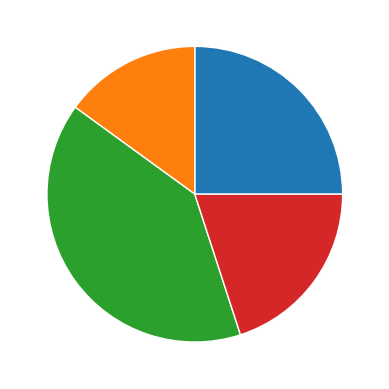

In [ ]:
a = np.array([25,15,40,20])

plt.pie(a)
plt.show()

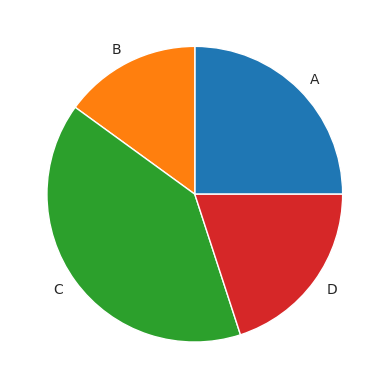

In [ ]:
a = np.array([25,15,40,20])
label = ["A","B","C","D"]
plt.pie(a, labels = label)
plt.show() 

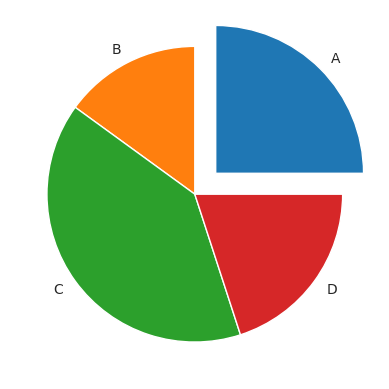

In [ ]:
a = np.array([25,15,40,20])
label = ["A","B","C","D"]
explode = [0.2,0,0,0]
plt.pie(a, labels = label, explode = explode)
plt.show() 

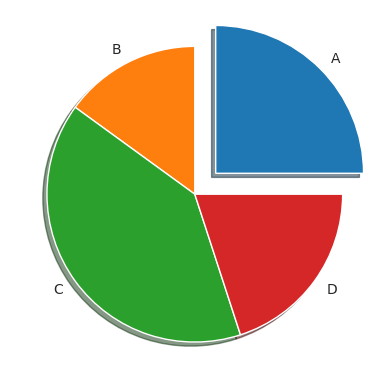

In [ ]:
a = np.array([25,15,40,20])
label = ["A","B","C","D"]
explode = [0.2,0,0,0]
plt.pie(a, labels = label, explode = explode, shadow = True)
plt.show() 

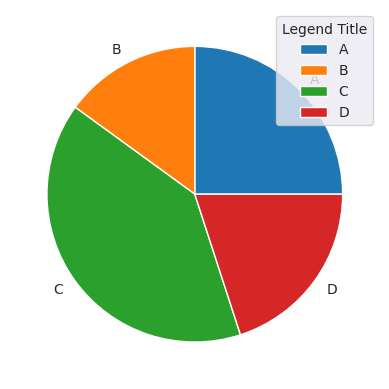

In [ ]:
a = np.array([25,15,40,20])
label = ["A","B","C","D"]
plt.pie(a, labels = label)
plt.legend(title = 'Legend Title')
plt.show() 

### Seaborn

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

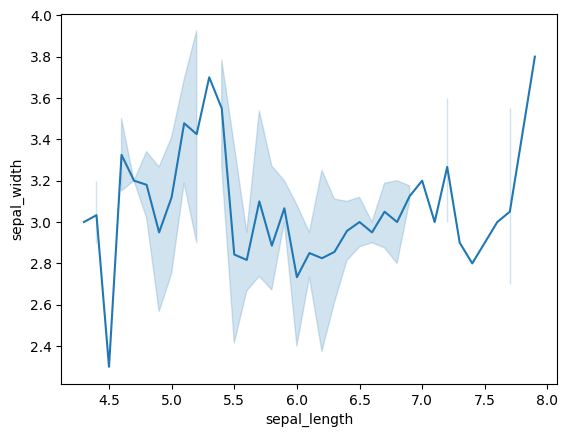

In [ ]:
data = sns.load_dataset('iris')

sns.lineplot(x="sepal_length", y="sepal_width", data=data)  

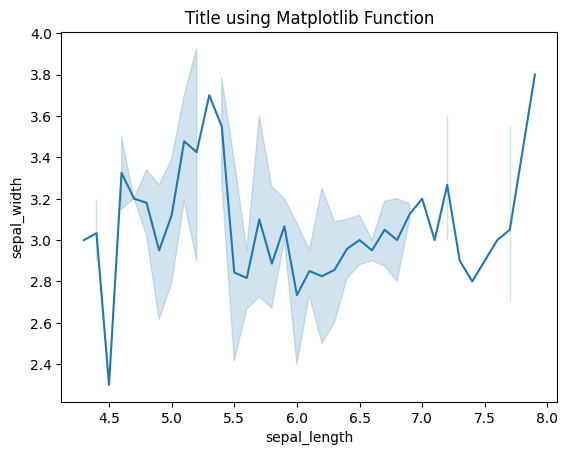

In [ ]:
sns.lineplot(x="sepal_length", y="sepal_width", data=data)  
plt.title('Title using Matplotlib Function')  

plt.show()

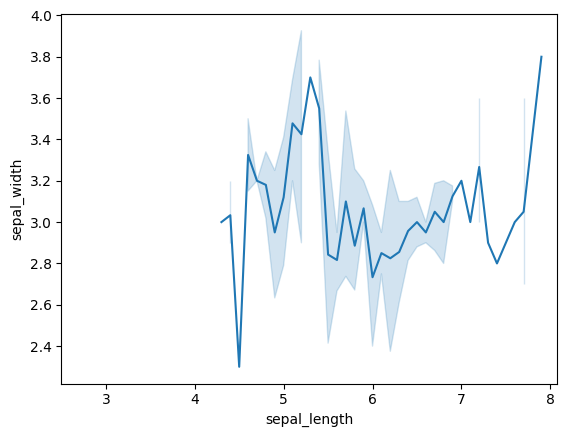

In [ ]:
sns.lineplot(x="sepal_length", y="sepal_width", data=data)  
plt.xlim(2.5)  

plt.show()

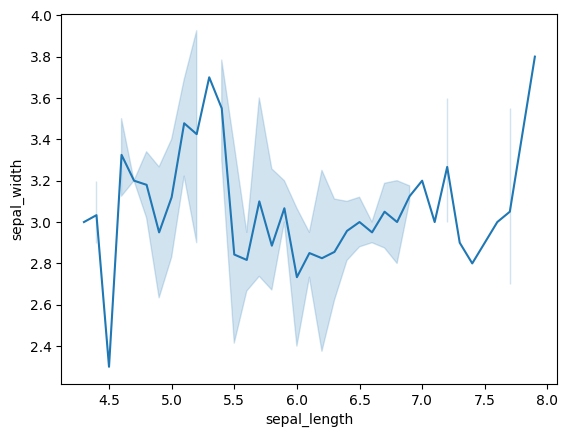

In [ ]:
sns.lineplot(x="sepal_length", y="sepal_width", data=data)  
sns.set_style("dark")  

plt.show()

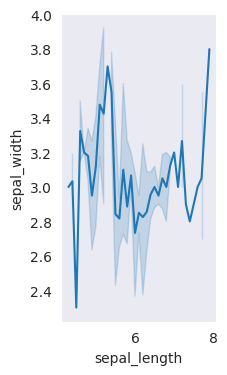

In [ ]:
plt.figure(figsize = (2, 4)) 
sns.lineplot(x="sepal_length", y="sepal_width", data=data) 

plt.show()

[Case Study](https://github.com/ramendrasingla/Human-or-Robot/blob/main/Business_Problem__EDA.ipynb)

# Part - 3

## Correlation Matrix

* A statistical method called correlation can be used to show the relationship between two variables
*  The pairwise correlation of each column in the dataframe is determined using this. Any **na** values are immediately disregarded. It is disregarded for any columns in the dataframe with non-numeric data types.

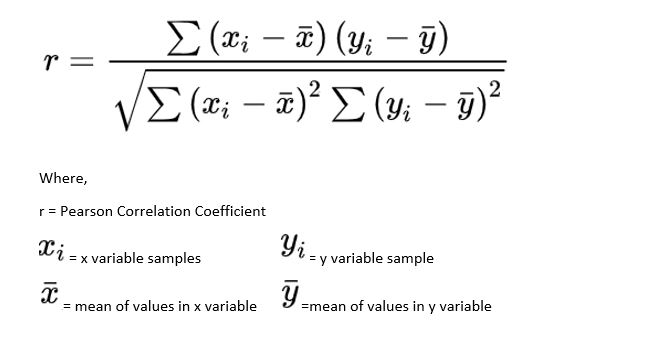

In [7]:
## Correlation formula
Image(filename='/content/drive/MyDrive/Newton School/Data Analysis/correlation_coefficient_formula.jpeg')

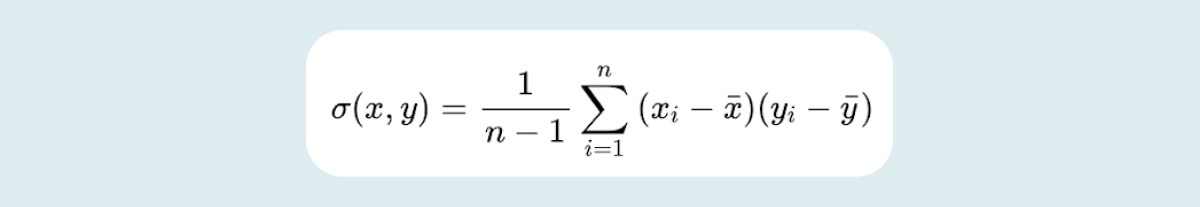

In [8]:
## Covariance formula
Image(filename='/content/drive/MyDrive/Newton School/Data Analysis/covariance_formula.jpeg')

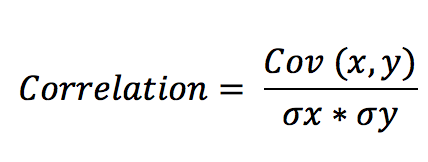

In [9]:
## Covariance and Correlation relationship
Image(filename='/content/drive/MyDrive/Newton School/Data Analysis/corr_cov.png')

In [5]:
data = {'A': [45, 37, 42, 50], 
        'B': [38, 31, 26, 90], 
        'C': [10, 15, 17, 100], 
        'D': [60, 99, 23, 56], 
        'E': [76, 98, 78, 90] 
        } 
  
df = pd.DataFrame(data) 
  
corrMatrix = df.corr() 
print(corrMatrix)

          A         B         C         D         E
A  1.000000  0.830705  0.769591 -0.440535 -0.324389
B  0.830705  1.000000  0.972514 -0.007424  0.256854
C  0.769591  0.972514  1.000000 -0.092702  0.309316
D -0.440535 -0.007424 -0.092702  1.000000  0.771163
E -0.324389  0.256854  0.309316  0.771163  1.000000


<ipython-input-6-0f83cd3e007e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  glue = sns.load_dataset("glue").pivot("Model", "Task", "Score")


<Axes: xlabel='Task', ylabel='Model'>

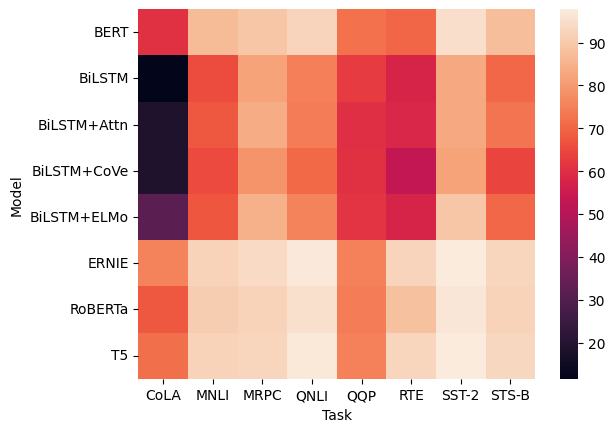

In [6]:
glue = sns.load_dataset("glue").pivot("Model", "Task", "Score") 
sns.heatmap(glue)

## Boxplot and outliers

* An outlier is an observation that is numerically distant from the rest of the data.
* When reviewing a box plot, an outlier is defined as a data point that is located outside the whiskers of the box plot.

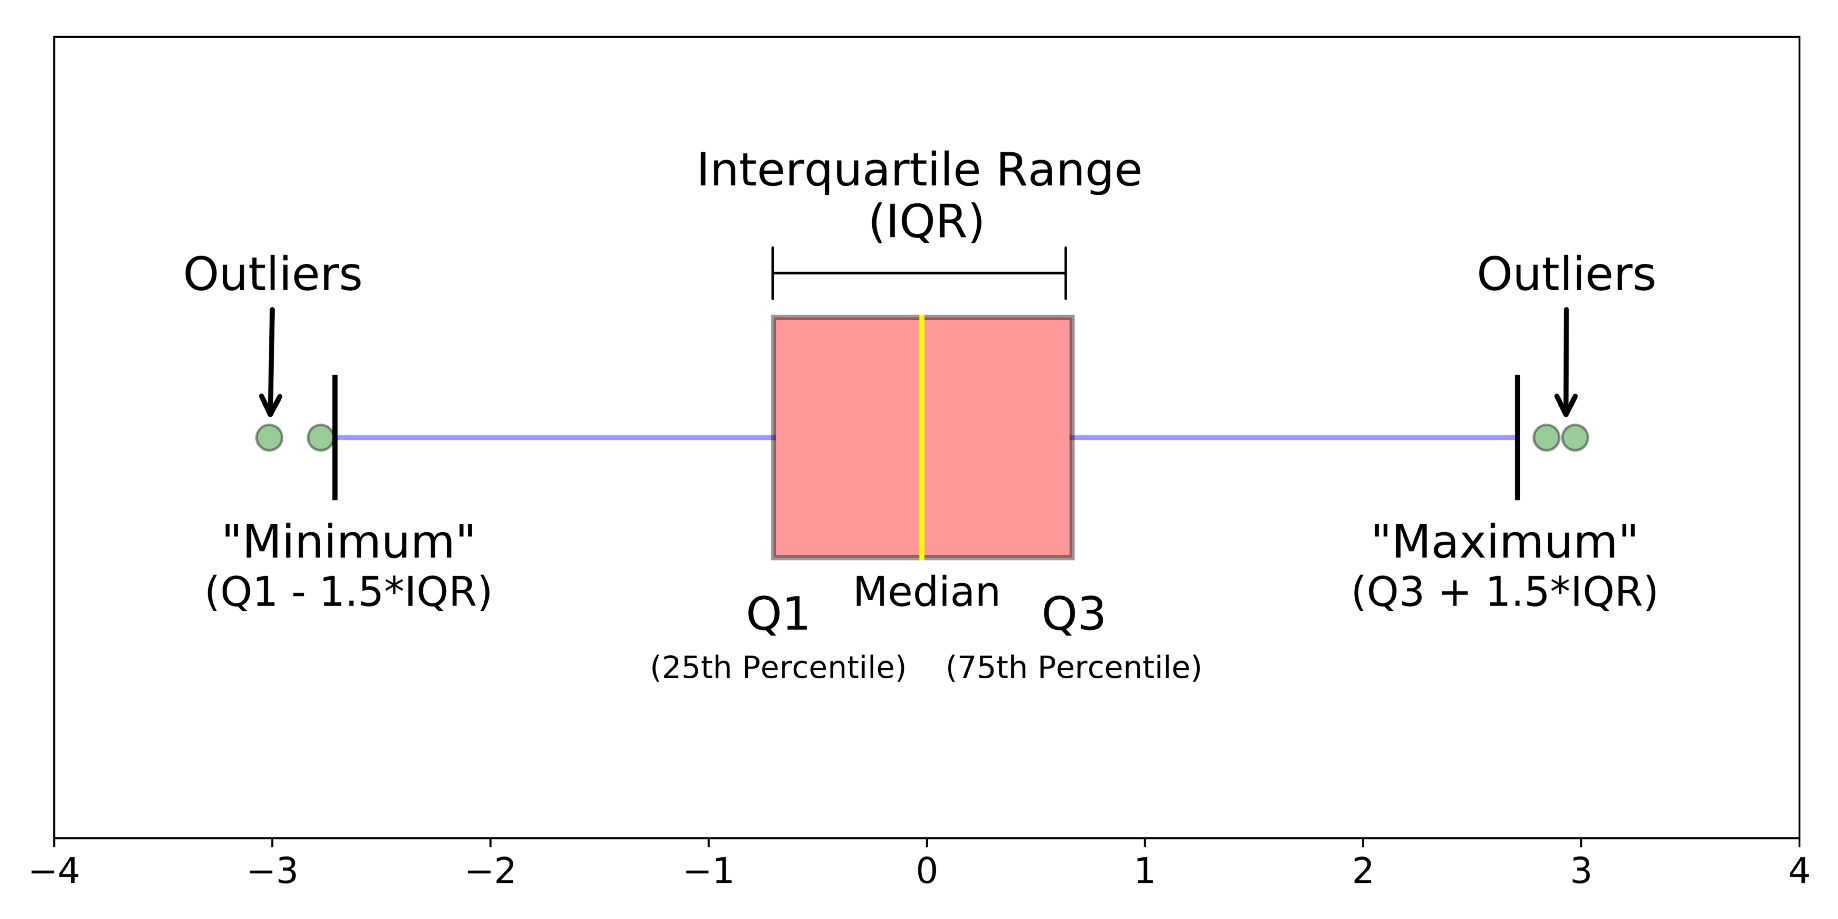

In [11]:
## Boxplot and outliers
Image(filename='/content/drive/MyDrive/Newton School/Data Analysis/boxplot-outliers.jpeg')

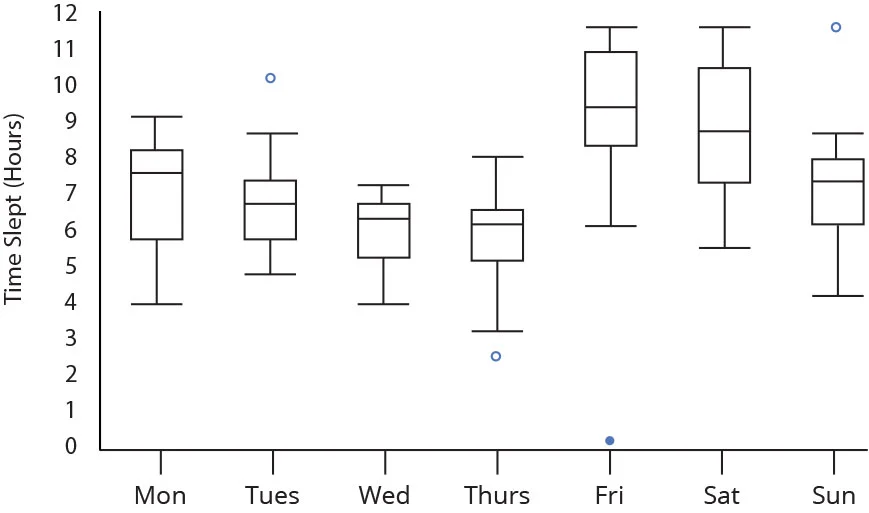

In [13]:
## Box-plots ~ Data Dispersion
Image(filename='/content/drive/MyDrive/Newton School/Data Analysis/boxplots-length.jpeg')

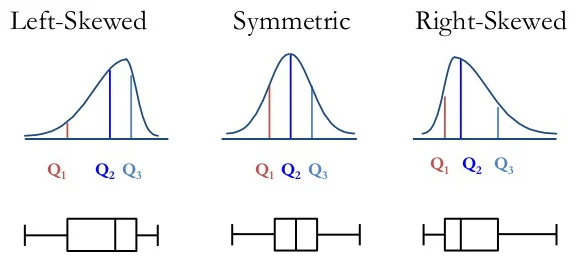

In [14]:
Image(filename='/content/drive/MyDrive/Newton School/Data Analysis/box-plots-distribution.jpeg')